# Fourier Pricing Integrals for Lévy Models

**Author:** Davis Koebig Griffin  

**Purpose:**  
Derive and analyze the Fourier inversion formula for European option pricing
under exponential Lévy models.  
We explicitly connect convergence of the pricing integral to the analytic
structure of the characteristic function identified in earlier notebooks.

This notebook focuses on **existence and convergence**, not numerical
implementation.

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## 1. Risk-Neutral Pricing Framework

Let the log-price process satisfy

$$
S_T = S_0 \exp(X_T),
$$

where $X_T$ is a Lévy process under the risk-neutral measure.
The time-0 price of a European payoff $H(S_T)$ is

$$
V_0 = e^{-rT} \mathbb{E}[H(S_T)].
$$

We assume that the characteristic function

$$
\phi_X(z) = \mathbb{E}[e^{izX_T}]
$$

exists in a vertical strip of the complex plane.

## 2. Fourier Representation of the Call Payoff

Consider a European call with strike $K$.
Let $k = \log K$.

The payoff can be written as

$$
(S_T - K)^+ = (e^{X_T} - e^k)^+.
$$

This payoff is not square-integrable, so we introduce a
**damping parameter** $\alpha > 0\$ to ensure integrability.

Define the damped payoff

$$
\tilde{H}(x) = e^{-\alpha x} (e^x - e^k)^+.
$$

For sufficiently large $\alpha$, $\tilde{H} \in L^1(\mathbb{R})$,
and its Fourier transform exists.

## 3. Fourier Pricing Integral

Using Fourier inversion, the call price admits the representation

$$
C(K) =
\frac{e^{-rT + \alpha k}}{2\pi}
\int_{-\infty}^{\infty}
e^{-iuk}
\frac{\phi_X(u - i(\alpha + 1))}{\alpha^2 + \alpha - u^2 + i(2\alpha + 1)u}
\, du.
$$

This is the fundamental pricing integral used in
Carr–Madan and Lewis-style Fourier methods.

## 4. Role of Analyticity

The integral is well-defined only if:

1. The characteristic function $\phi_X(z)$ is analytic at
   $z = u - i(\alpha + 1)$
2. The contour shift does not cross singularities
3. The integrand decays sufficiently fast as $|u| \to \infty$

These conditions depend entirely on the **analytic strip**
of $\phi_X(z)$.

### 4.1 Variance Gamma (VG)

- The VG characteristic function is meromorphic
- A vertical strip of analyticity exists
- The damping parameter $\alpha\$ must satisfy:

$$
\Im(z_-) < -(\alpha + 1) < \Im(z_+)
$$

Failure to satisfy this condition leads to divergence
or missing residue contributions.

### 4.2 CGMY

- CGMY characteristic functions have branch points
- No globally valid vertical strip exists
- Contour shifts are restricted by branch cuts

As a result, standard Fourier pricing formulas may fail
or require modification.

## 5. Decay of the Integrand

Convergence of the pricing integral depends on the balance between:

- Growth of the payoff Fourier transform
- Decay of the characteristic function

The decay rate of $\phi_X(u - i\eta)$ is governed by
the imaginary shift $\eta$, which must lie inside the
analytic domain.

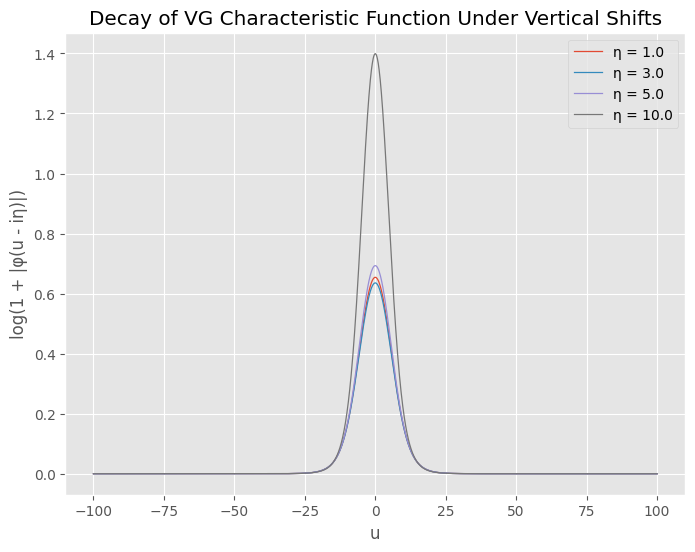

In [12]:
def phi_VG(u, T, sigma, nu, theta):
    return (1 - 1j*theta*nu*u + 0.5*sigma**2 * nu * u**2)**(-T/nu)

T = 1.0
sigma = 0.2
nu = 0.2
theta = -0.1

u_vals = np.linspace(-100, 100, 2000)
etas = [1.0, 3.0, 5.0, 10.0]

plt.figure(figsize=(8, 6))
for eta in etas:
    vals = phi_VG(u_vals - 1j*eta, T, sigma, nu, theta)
    plt.plot(u_vals, np.log1p(np.abs(vals)), label=f"η = {eta}", linewidth = 0.9)  # log(1+|φ|)

plt.xlabel("u")
plt.ylabel("log(1 + |φ(u - iη)|)")
plt.title("Decay of VG Characteristic Function Under Vertical Shifts")
plt.legend()
plt.show()

The plot demonstrates:

- Increasing $\eta$ improves decay
- Excessive shifting risks crossing poles
- Optimal damping lies strictly inside the analytic strip

This trade-off motivates contour deformation
and residue-based corrections.

## 6. Why FFT Pricing Works (When It Does)

FFT pricing succeeds when:

- A suitable damping parameter exists
- The contour shift avoids singularities
- The characteristic function decays rapidly

These conditions are satisfied for VG
but may fail for CGMY.

## Next Step

In the next notebook, we implement the Fourier pricing integral numerically
using FFT techniques and compare results against analytic expectations.

Subsequent notebooks will explore contour deformation and residue corrections
when these assumptions break down.

## Summary

- Fourier pricing relies on analytic continuation of the characteristic function
- Damping parameters correspond to vertical contour shifts
- Analytic strips determine admissible pricing contours
- Pole and branch structures directly affect convergence

This notebook bridges analytic structure and numerical pricing methods.